<a href="https://colab.research.google.com/github/unknownt62/Resources/blob/main/Gradio_Demo_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Gradio?

Gradio is an open-source Python library that lets you create **web-based GUIs** from your machine learning (ML) models in just a few lines of code. These GUIs allow your models to be **used and tested by non-ML people** without any specialized hardware or software, directly from the browser!

![link text](https://i.imgur.com/MCfZmjd.png)


# What Problem is Gradio Solving?

Gradio helps make machine learning models more **trustworthy** and **robust**. It does that by making it easier for end users (often times, non-ML people!) to probe models for weaknesses and biases. 

Consider this facial reconstruction algorithm, which was found to have a bias in that reconstructed faces tended have more Caucasian features. The algorithm overall worked better on White faces than Black faces: 

![link text](https://i.imgur.com/fl4LE2r.png)

Why do machine learning models like this one fail in the real world? Most of the time because they haven't been properly tested on diverse use cases (a test set often isn't representative enough!) Machine learning researchers usually don't have the "real-world" expertise to collect or generate diverse datasets, but their end users (collaborators / subject-matter experts / customers) do. 

Gradio lets you effectively put your model in front of end users, so that they can: 
* test the model in diverse settings
* flag problematic predictions
* add rare data to your dataset

# How do I use Gradio?

### 0. Installation

`gradio` is a Python package, so it can be installed with `pip`.

In [2]:
!pip install --quiet gradio

     |████████████████████████████████| 1.1MB 7.2MB/s 
     |████████████████████████████████| 215kB 21.3MB/s 
     |████████████████████████████████| 3.2MB 29.8MB/s 
     |████████████████████████████████| 962kB 52.6MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 


### 1. Basic Usage: "Hello World"

At it's core, `gradio` allows you to wrap UI elements around Python functions. There are a variety of UI elements including:

* `Image` (drag-and-drop image interface)
* `Textbox` (write freeform text)
* `Microphone` (record audio)
* `Slider` (select a numerical value)

and [many, many more](https://gradio.app/docs)! These are just the input interfaces. Most of these have corresponding output interfaces as well. With gradio, you simply combine 3 ingredients: **a Python function**, an **input component**, and an **output component**, and you're ready to go!

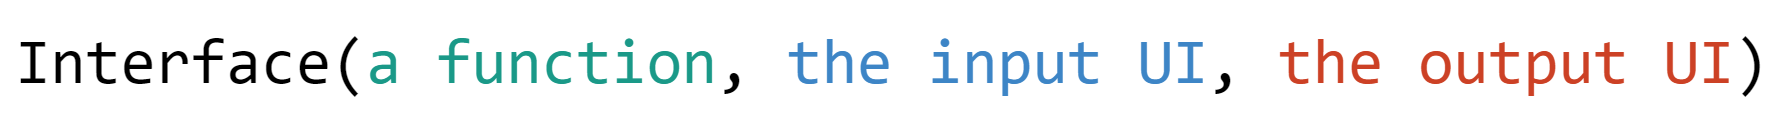

Let's start with a basic example:

In [3]:
import gradio as gr

def replace(text):
    return text.replace('World', 'from Gradio')

gr.Interface(fn=replace, 
             inputs='textbox', 
             outputs='textbox').launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://31823.gradio.app
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`


### 2. MNIST Example (and Flagging!)

Now that we've gotten the basic idea, let's try with a more interesting example, a machine learning model:

In [4]:
# Loading the MNIST model
import tensorflow as tf
from urllib.request import urlretrieve

urlretrieve("https://gr-models.s3-us-west-2.amazonaws.com/mnist-model.h5", "mnist-model.h5")
model = tf.keras.models.load_model("mnist-model.h5")

In [5]:
# Creating a prediction function

def recognize_digit(image):
    image = image.reshape(1, -1)  # add a batch dimension
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

gr.Interface(fn=recognize_digit, 
             inputs="sketchpad", 
             outputs=gr.outputs.Label(num_top_classes=3),  # instead of "label" 
             ).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://44845.gradio.app
Interface loading below...


### 2b. MNIST (Live Predictions)

In [6]:
gr.Interface(fn=recognize_digit, 
             inputs="sketchpad", 
             outputs=gr.outputs.Label(num_top_classes=3), 
             live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://16068.gradio.app
Interface loading below...


### 3. Manipulating Images (and Sharing!)

In [7]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

inception_net = tf.keras.applications.InceptionV3() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = np.expand_dims(inp, 0)
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label).launch(share=True);

96116736/96112376 [==============================] - 1s 0us/step
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://39598.gradio.app
Interface loading below...


### How does sharing and flagging work?

![link text](https://gradio.app/static/home/img/sharing.svg)

# 3b. Adding Interpretation in 1 Line (*NEW*) 

In [8]:
gr.Interface(fn=classify_image, inputs=image, outputs=label, interpretation="default").launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://33127.gradio.app
Interface loading below...


### 4. Multiple Inputs and Outputs

In [9]:
import gradio as gr

def greet(name, is_morning, temperature):
  salutation = "Good morning" if is_morning else "Good evening"
  greeting = "%s %s. It is %s degrees today" % (salutation, name, temperature)
  celsius = (temperature - 32) * 5 / 9
  return greeting, round(celsius, 2)

gr.Interface(
  greet, 
  ["text", "checkbox", gr.inputs.Slider(0, 100)],
  ["text", "number"]).launch();

[2021-03-18 18:24:52,053] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://48692.gradio.app
Interface loading below...


### 5. Comparing Multiple Models in Parallel and Adding Metadata

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
import requests
from urllib.request import urlretrieve

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

# Download sample images
urlretrieve("https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/cc_BE6RJF_16x9.jpg?itok=nP17Fm9H","monkey.jpg")
urlretrieve("https://www.discoverboating.com/sites/default/files/inline-images/buying-a-sailboat-checklist.jpg","sailboat.jpg")
urlretrieve("https://external-preview.redd.it/lG5mI_9Co1obw2TiY0e-oChlXfEQY3tsRaIjpYjERqs.jpg?auto=webp&s=ea81982f44b83efbb803c8cff8953ee547624f70","bicycle.jpg")

mobile_net = tf.keras.applications.MobileNetV2()
inception_net = tf.keras.applications.InceptionV3()

def classify_image_with_mobile_net(im):
  im = Image.fromarray(im.astype('uint8'), 'RGB')
  im = im.resize((224, 224))
  arr = np.array(im).reshape((-1, 224, 224, 3))
  arr = tf.keras.applications.mobilenet.preprocess_input(arr)
  prediction = mobile_net.predict(arr).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}


def classify_image_with_inception_net(im):
  im = Image.fromarray(im.astype('uint8'), 'RGB')
  im = im.resize((299, 299))
  arr = np.array(im).reshape((-1, 299, 299, 3))
  arr = tf.keras.applications.inception_v3.preprocess_input(arr)
  prediction = inception_net.predict(arr).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

imagein = gr.inputs.Image()
label = gr.outputs.Label(num_top_classes=3)
sample_images = [["monkey.jpg"],
                 ["sailboat.jpg"],
                 ["bicycle.jpg"]]

gr.Interface(
    [classify_image_with_mobile_net, classify_image_with_inception_net],
    imagein,
    label,
    title="MobileNet vs. InceptionNet",
    description="Compare 2 state-of-the-art machine learning models",
    examples=sample_images).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://46681.gradio.app
Interface loading below...
